In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('cleaned_results.csv')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True
...,...,...,...,...,...,...,...,...,...
4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro,Leigh,Sweden,True
4880,2022-07-23,France,Netherlands,1,0,UEFA Euro,Rotherham,France,True
4881,2022-07-26,England,Sweden,4,0,UEFA Euro,Sheffield,England,False
4882,2022-07-27,Germany,France,2,1,UEFA Euro,Milton Keynes,Germany,True


In [4]:
df['date'].dtype

dtype('O')

In [5]:
df['date'] = pd.to_datetime(df['date'])

# Histogram for Home score values

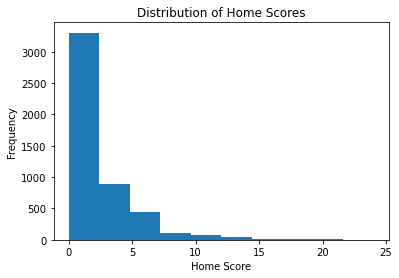

In [6]:
plt.hist(df['home_score'], bins=10)
plt.xlabel('Home Score')
plt.ylabel('Frequency')
plt.title('Distribution of Home Scores')
plt.show()

# Statistical Analysis

In [7]:
home_score_mean = df['home_score'].mean()
home_score_median = df['home_score'].median()

print("Home score mean value : ", home_score_mean)
print("Home score median value : ", home_score_median)

Home score mean value :  2.272727272727273
Home score median value :  1.0


# Bar plot for different Tournaments

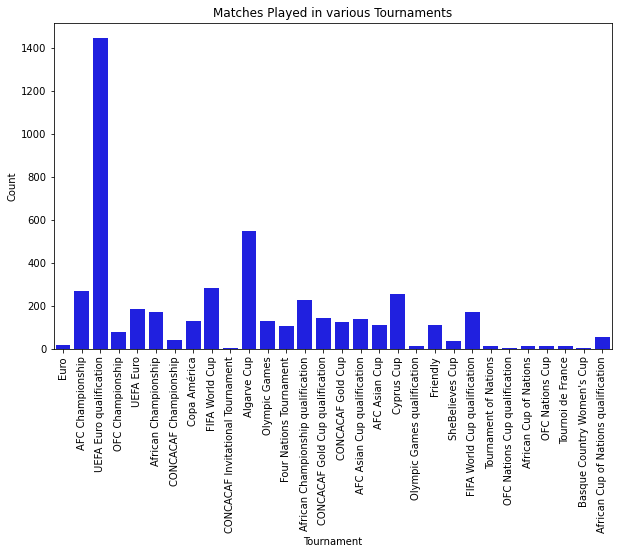

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='tournament', data=df, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.title('Matches Played in various Tournaments')
plt.show()

In [9]:
# Identify the team with the most wins
winning_teams = df.loc[df['home_score'] > df['away_score'], 'home_team']
winning_teams


0          Italy
1        Denmark
2        England
3          Italy
4       Thailand
          ...   
4879      Sweden
4880      France
4881     England
4882     Germany
4883     England
Name: home_team, Length: 2565, dtype: object

In [10]:
winning_team_counts = winning_teams.value_counts()
winning_team_counts

United States           229
Germany                 122
China PR                116
Norway                  116
Sweden                  107
                       ... 
Palestine                 1
Benin                     1
Armenia                   1
Netherlands Antilles      1
Réunion                   1
Name: home_team, Length: 163, dtype: int64

In [11]:
most_wins_team = winning_team_counts.idxmax()
print("The most Winning Team is : ", most_wins_team )

The most Winning Team is :  United States


In [12]:
# Top five winning teams
winning_team_counts.head(5)

United States    229
Germany          122
China PR         116
Norway           116
Sweden           107
Name: home_team, dtype: int64

# Team with the Hhighest goal scored

In [13]:
home_Score = df.groupby('home_team')['home_score'].sum()
away_Score = df.groupby('home_team')['away_score'].sum()
total_score = home_Score+away_Score
total_score = total_score.sort_values(ascending=False)
total_score

home_team
United States           1053
China PR                 647
Norway                   613
Germany                  609
Sweden                   548
                        ... 
Mauritania                 1
Curaçao                    1
Basque Country             1
Netherlands Antilles       1
Western Australia          1
Length: 198, dtype: int64

# Best players of the Era

In [14]:
df_60s = df[(df['date'].dt.year>=1960) & (df['date'].dt.year<=1969)]
df_70s = df[(df['date'].dt.year>=1970) & (df['date'].dt.year<=1979)]
df_80s = df[(df['date'].dt.year>=1980) & (df['date'].dt.year<=1989)]
df_90s = df[(df['date'].dt.year>=1990) & (df['date'].dt.year<=1999)]
df_2000s = df[(df['date'].dt.year>=2000) & (df['date'].dt.year<=2009)]
df_2010s = df[(df['date'].dt.year>=2010) & (df['date'].dt.year<=2019)]
df_2020s = df[(df['date'].dt.year>=2020) & (df['date'].dt.year<=2029)]

In [15]:
def best_team(df, era):
    winning_teams = df.loc[df['home_score'] > df['away_score'], 'home_team']
    print("Top 5 winning teams of the ", era,"s :" )
    print(winning_teams.head(5).values)
    
    print("-----------------------------------------------------------------")
    
    home_Score = df.groupby('home_team')['home_score'].sum()
    away_Score = df.groupby('home_team')['away_score'].sum()
    total_score = home_Score+away_Score
    total_score = total_score.sort_values(ascending=False)
    
    print("Top 5 teams with the highest scores in the ", era, "s : ")
    print(total_score.head(5).index.values)
    
    print("=================================================================")

In [16]:
best_team(df_60s, "60")
best_team(df_70s, "70")
best_team(df_80s, "80")
best_team(df_90s, "90")
best_team(df_2000s, "2000")
best_team(df_2010s, "2010")
best_team(df_2020s, "2020")

Top 5 winning teams of the  60 s :
['Italy' 'Denmark' 'England' 'Italy']
-----------------------------------------------------------------
Top 5 teams with the highest scores in the  60 s : 
['Denmark' 'Italy' 'England']
Top 5 winning teams of the  70 s :
['Thailand' 'Thailand' 'New Zealand' 'Australia' 'New Zealand']
-----------------------------------------------------------------
Top 5 teams with the highest scores in the  70 s : 
['Thailand' 'Taiwan' 'Italy' 'New Zealand' 'Australia']
Top 5 winning teams of the  80 s :
['India S' 'India S' 'Taiwan' 'Western Australia' 'India N']
-----------------------------------------------------------------
Top 5 teams with the highest scores in the  80 s : 
['Thailand' 'Taiwan' 'England' 'Sweden' 'Italy']
Top 5 winning teams of the  90 s :
['Italy' 'England' 'Denmark' 'Switzerland' 'Finland']
-----------------------------------------------------------------
Top 5 teams with the highest scores in the  90 s : 
['Norway' 'China PR' 'Brazil' 'Japan

# Advantage of Playing at home

In [17]:
home_wins = df.loc[df['home_score'] > df['away_score']]
away_wins = df.loc[df['home_score'] < df['away_score']]
draws = df.loc[df['home_score'] == df['away_score']]
home_advantage = (len(home_wins) / len(df)) * 100
away_advantage = (len(away_wins) / len(df)) * 100
draw_percentage = (len(draws) / len(df)) * 100

print("Home advantage percentage : ", home_advantage, "%")
print("Away advantage percentage : ", away_advantage, "%")
print("Draw percentage : ", draw_percentage, "%" )

Home advantage percentage :  52.518427518427515 %
Away advantage percentage :  33.435708435708435 %
Draw percentage :  14.045864045864045 %


# New Countries over the years

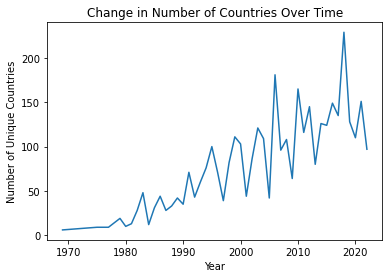

In [18]:
df['year'] = df['date'].dt.year
unique_countries_by_year = df.groupby('year')['home_team', 'away_team'].nunique().sum(axis=1)

plt.plot(unique_countries_by_year.index, unique_countries_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Unique Countries')
plt.title('Change in Number of Countries Over Time')
plt.show()

In [19]:
matches_between_countries = df.groupby(['home_team', 'away_team']).size().reset_index(name='matches')

matches_matrix = matches_between_countries.pivot(index='home_team', columns='away_team', values='matches')

correlation_matrix = matches_matrix.corr()

correlation_matrix
# plt.figure(figsize=(10, 8))

# sns.heatmap(correlation_matrix)
# plt.show()

away_team,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Western Australia,Zambia,Zimbabwe
away_team,,,,,,,,,,,,,,,,,,,,,
Albania,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.555556,NaN,NaN,NaN,NaN,NaN,0.037987,NaN,NaN,NaN
Algeria,NaN,1.000000,NaN,NaN,-0.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.522233
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,-0.500000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.755929,0.774597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.970431,NaN,0.794996,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Wales,0.037987,NaN,NaN,NaN,NaN,NaN,NaN,-0.346154,-0.112028,NaN,...,-0.160675,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


# Countries that have played together the most

In [20]:
matches_between_countries.sort_values(ascending=False, by = 'matches')

,home_team,away_team,matches
865,Germany,Norway,23
1620,Norway,Denmark,21
2364,United States,China PR,19
1647,Norway,United States,17
2380,United States,Mexico,16
...,...,...,...
1050,Iceland,Romania,1
1046,Iceland,Northern Ireland,1
1043,Iceland,Macedonia,1
1042,Iceland,Latvia,1


# Countries that hosted the match while they are not participating

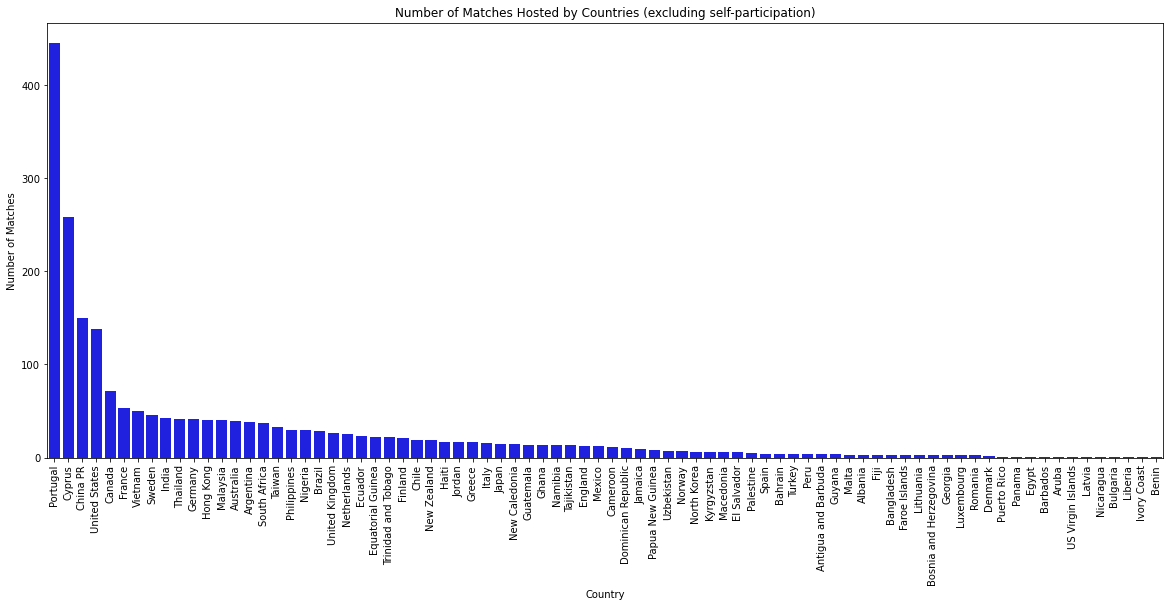

In [21]:
host_countries = df[df['home_team'] != df['country']]

matches_by_host = host_countries['country'].value_counts()

plt.figure(figsize=(20, 8))
sns.barplot(x=matches_by_host.index, y=matches_by_host.values, color='blue')
plt.title("Number of Matches Hosted by Countries (excluding self-participation)")
plt.xlabel("Country")
plt.ylabel("Number of Matches")
plt.xticks(rotation=90)
plt.show()

# Filtering Friendly matches

In [22]:
friendly_matches = df[df['tournament'].str.contains('Friendly')]

friendly_matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
2857,2012-02-12,United States,New Zealand,2,1,Friendly,Frisco,United States,False,2012
2927,2012-04-01,Japan,United States,1,1,Friendly,Sendai,Japan,False,2012
2929,2012-04-03,Brazil,United States,0,3,Friendly,Chiba,Japan,True,2012
2951,2012-05-28,United States,China PR,4,1,Friendly,Chester,United States,False,2012
2953,2012-06-16,Sweden,United States,1,3,Friendly,Halmstad,Sweden,False,2012
...,...,...,...,...,...,...,...,...,...,...
4670,2020-11-27,Netherlands,United States,0,2,Friendly,Breda,Netherlands,False,2020
4699,2021-01-19,United States,Colombia,4,0,Friendly,Orlando,United States,False,2021
4700,2021-01-23,United States,Colombia,6,0,Friendly,Orlando,United States,False,2021
4718,2021-04-10,Sweden,United States,1,1,Friendly,Solna,Sweden,False,2021


# Colinearity check

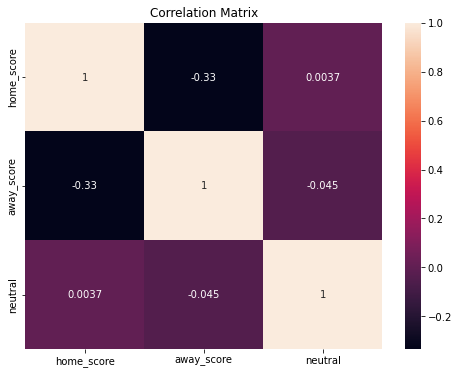

In [27]:
df['neutral'] = df['neutral'].astype(int)

numerical_cols = ['home_score', 'away_score', 'neutral']


corr_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()